In [3]:
%config Completer.use_jedi = False

In [2]:
# 데이터 준비
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

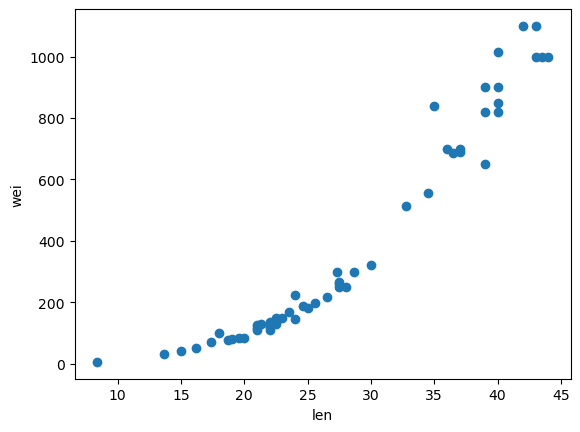

In [7]:
#준비된 데이터를 산점도로
#길이가 증가함에 따라 무게가 증가하는 경향을 띈다.
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('len')
plt.ylabel('wei')
plt.show()

In [11]:
#테스트 세트, 훈련 세트로 데이터 나누기

from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    perch_length,perch_weight,random_state = 42)
print(train_input.shape,test_input.shape)

(42,) (14,)


In [15]:
#numpy의 reshape
#reshape: 배열의 크기, 배열 원소의 크기
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2,2)
print(test_array)
print(test_array.shape)

(4,)
[[1 2]
 [3 4]]
(2, 2)


In [17]:
#사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다.
# perch_length가 2차원 배열이기 때문에 이를 나눈 train_input, test_input도 1차원 배열이다.
# 이런 1차원 배열을 2차원 배열로 바꿔야 한다.
# 이때 reshape를 사용

# reshape
# 크기에 -1을 지정하면 나머지 원소 개소로 모두 채우라

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input,test_input)
print(train_input.shape, test_input.shape)


[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]] [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]
(42, 1) (14, 1)


In [29]:
#결정계수 R^2
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
knr.score(test_input,test_target)

0.992809406101064

의미하는 게 뭘까?

분류의 경우에는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율. 즉, 정확동였다.
간단히 말해 정답을 맞힌 개수의 비율이다.

회귀에서는 정확한 숫자를 맞인다는 것은 불가능이다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다.
회귀의 경우에는 점수를 결정계수라고 부른다.(또는 간단히 R^2)

R^2이 0에 가까워지면 타깃의 평균 정도를 예측하는 수준
1에 가까워지면 예측이 타깃에 아주 가까워짐.

In [23]:
'''
결정계수를 직관적으로 이해하기 어렵다
타깃과 예측한 값 사이의 차이를 구해 보면 어느 정도 예측이 벗어났는지 가늠하기 좋다.
'''

from sklearn.metrics import mean_absolute_error
# sklearn.metrics은 여러 가지 측정 도구를 제공한다.

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평귱 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [31]:
print(knr.score(train_input,train_target))
print(knr.score(test_input, test_target))

# 테스트 세트가 훈련 세트보다 점수가 높다. -> 과소적합

0.9698823289099254
0.992809406101064


In [34]:
# 과소 적합일 경우 모델을 좀 더 복잡하게 만들자.
# 이웃의 개수 k를 줄이자
# 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해진다.
# 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다.

# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련한다.
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

# 예상대로, 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결함
# 또한, 두 점수의 차이가 크지 않기에 과대 적합이 아님
# 이 모댈이 테스트 세트와 추가될 농어 데이터도 일반화 잘하리라 예상 가

0.9804899950518966
0.9746459963987609
